# Plotting Data Related to Heart Disease 

### We will be using pandas, matplotlib, and seaborn (which builds on matplotlib) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read our data file, heart.csv. Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data
# Note, the target value is encoded incorrectly, 0 is positive for heart disease, 1 is negative.
# See https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/discussion/401933
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
# Show our table to take a look at general statistics about our data. 
# You can see  that our data is skewed towards males, as the mean sex is 0.69 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Here we map sex and target values to meaningful labels, since digits aren't intuitive. 
data['sex'] = data['sex'].map({1: 'Male', 0: 'Female'})
data['target'] = data['target'].map({1: 'Negative', 0: 'Positive'})

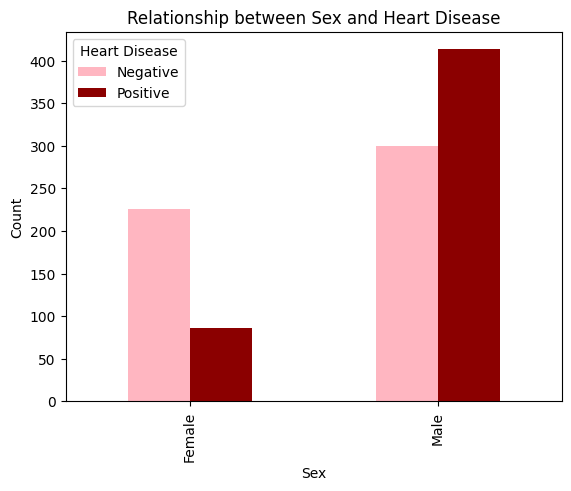

In [7]:
# Create a DataFrame that calculates the total number of males and females with negative and positive values for heart disease respectively
count_data = data.groupby(['sex', 'target']).size().unstack(fill_value=0)

# Plot the grouped bar plot, giving each bar a unique color. 
count_data.plot(kind='bar', color=['lightpink', 'darkred'])

# Customize the plot with a title, a legend, and marked x and y labels. 
plt.legend(title='Heart Disease', loc='upper left')
plt.title('Relationship between Sex and Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

In [8]:
# Load our data again, since did some mapping on our old data. 
df=pd.read_csv('heart.csv')

# Apply a filter for individuals above the age of 65 and map it to a new dataframe
above_65_data = df[df['age'] >65]

# Create a cross-tabulation (crosstab). See  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html 
# This is a different approach than using a groupby() as we did above. 
ct_above_65 = pd.crosstab(above_65_data['sex'], above_65_data['target'])

# Reindex the crosstab to change the order of columns, we want to show negative results first. 
ct_above_65 = ct_above_65.reindex([1, 0], axis=1)

# Print our crosstab so we know we've got the results we want. 
ct_above_65

target,1,0
sex,,
0,39,4
1,16,52


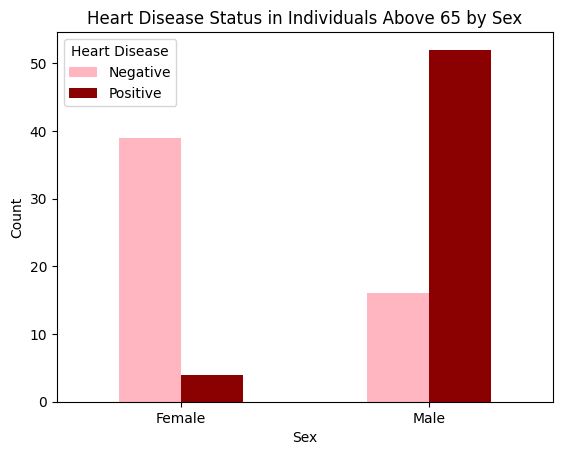

In [9]:
# Plot the side-by-side bar chart with indicative colors, lightpink for negative, dark red for positive. 
ax = ct_above_65.plot(kind='bar', color=['lightpink', 'darkred'])

# Customize the plot with a title, x and y labels, and a legend. 
plt.title('Heart Disease Status in Individuals Above 65 by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')

# Since we did not do a mapping this time around, we need to instead change the names of values in our legend. 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Negative', 'Positive'], title='Heart Disease', loc='upper left')

# Customize x-axis labels, since we did not do a mapping during this approach. 
ax.set_xticklabels(['Female', 'Male'], rotation=0)

# Show the plot
plt.show()

We can see (in our data) that men are more likely to have heart disease than women. 

What about an age comparison of men by decade?

In [15]:
# We can of course fitler by men only and save that as a view. Note that this isn't a new dataframe in itself. 
men_only = df[df['sex']==1]
men_only

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [21]:
""" Create a new column for the age group
Since men_only is a view, and not a new dataframe, 
we need to act on the original dataframe by using .loc()
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
if we want to create a new column in the dataframe. 
In this case, I create a new column called age_group,
and set the appropriate boundaries for each bin 
(29 is the minimum wage, 80 is beyond the oldest, which is 77, the others are boundaries). 
I also use copy() to copy  the result of the cut so I act on the copy and not the original dataframe. 
"""
men_only.loc[:, 'age_group'] = pd.cut(men_only['age'], bins=[29, 40, 50, 60, 70, 80], labels=['29-40', '41-50', '51-60', '61-70', '71-80']).copy()


In [22]:
# We can print men_only to confirm the view has the new column and appropriately assigned data. 
men_only

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,51-60
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,51-60
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,61-70
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,61-70
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1,41-50
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,51-60
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,51-60
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,41-50


In [23]:
# Calculate the percentage of men with positive heart disease cases in each age group based on total count
percentage_positive_heart_disease = (men_only[men_only['target'] == 0].groupby('age_group')['target'].count() / men_only.groupby('age_group')['target'].count()) * 100



/tmp/ipykernel_88222/1117419598.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_positive_heart_disease = (men_only[men_only['target'] == 0].groupby('age_group')['target'].count() / men_only.groupby('age_group')['target'].count()) * 100


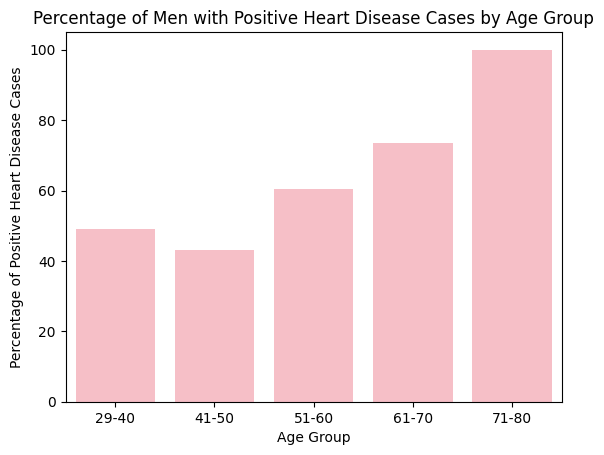

In [24]:
# Plot the bar chart
sns.barplot(x=percentage_positive_heart_disease.index, y=percentage_positive_heart_disease.values, color='lightpink')

# Customize the plot
plt.title('Percentage of Men with Positive Heart Disease Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Positive Heart Disease Cases')

# Show the plot
plt.show()